In [1]:
using JLD2, CairoMakie, FreqTables
using Jchemo, JchemoData
using GLMakie
CairoMakie.activate!()

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/corn.jld2")
@load db dat
pnames(dat)

(:Xm5, :Xmp5, :Xmp6, :Xm5nbs, :Xmp5nbs, :Xmp6nbs, :Y)

In [3]:
Xm5 = dat.Xm5
Xmp5 = dat.Xmp5
Xmp6 = dat.Xmp6
Xm5nbs = dat.Xm5nbs
Xmp5nbs = dat.Xmp5nbs
Xmp6nbs = dat.Xmp6nbs

Row,1100.0,1102.0,1104.0,1106.0,1108.0,1110.0,1112.0,1114.0,1116.0,1118.0,1120.0,1122.0,1124.0,1126.0,1128.0,1130.0,1132.0,1134.0,1136.0,1138.0,1140.0,1142.0,1144.0,1146.0,1148.0,1150.0,1152.0,1154.0,1156.0,1158.0,1160.0,1162.0,1164.0,1166.0,1168.0,1170.0,1172.0,1174.0,1176.0,1178.0,1180.0,1182.0,1184.0,1186.0,1188.0,1190.0,1192.0,1194.0,1196.0,1198.0,1200.0,1202.0,1204.0,1206.0,1208.0,1210.0,1212.0,1214.0,1216.0,1218.0,1220.0,1222.0,1224.0,1226.0,1228.0,1230.0,1232.0,1234.0,1236.0,1238.0,1240.0,1242.0,1244.0,1246.0,1248.0,1250.0,1252.0,1254.0,1256.0,1258.0,1260.0,1262.0,1264.0,1266.0,1268.0,1270.0,1272.0,1274.0,1276.0,1278.0,1280.0,1282.0,1284.0,1286.0,1288.0,1290.0,1292.0,1294.0,1296.0,1298.0,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.0540352,0.0523974,0.0505351,0.0487553,0.0472213,0.0460168,0.0452594,0.0449237,0.0452337,0.046186,0.0480962,0.0507638,0.0542778,0.058134,0.061736,0.0645508,0.0658708,0.0657886,0.0644987,0.062805,0.0614276,0.0607916,0.060864,0.0611817,0.0611433,0.0603421,0.0587412,0.0566745,0.0547035,0.0531855,0.0523667,0.05237,0.0530085,0.0543295,0.0562837,0.0590217,0.062601,0.0674265,0.0733093,0.0807053,0.0893879,0.0996015,0.111009,0.122663,0.133721,0.143079,0.149785,0.153049,0.153692,0.152131,0.149678,0.147394,0.145669,0.144925,0.145009,0.145786,0.14694,0.148356,0.15003,0.152151,0.154927,0.15866,0.162986,0.167636,0.17193,0.175239,0.177689,0.1797,0.182196,0.186405,0.192646,0.201554,0.21277,0.226224,0.241995,0.259936,0.280013,0.302304,0.323986,0.342402,0.355185,0.359048,0.355091,0.343989,0.328734,0.30996,0.289824,0.268278,0.24642,0.225811,0.206847,0.191512,0.178627,0.167717,0.158034,0.148735,0.139612,0.131082,0.123252,0.116918,⋯
2,0.0538763,0.052227,0.0503497,0.0485493,0.0469975,0.0457683,0.0449883,0.0446286,0.0449252,0.045874,0.0477965,0.0504825,0.0540272,0.0579163,0.0615483,0.0643928,0.0657385,0.0656849,0.0644232,0.0627451,0.0613665,0.0607099,0.0607494,0.0610329,0.0609756,0.0601762,0.0585817,0.0565314,0.0545634,0.0530397,0.0522251,0.0522405,0.0528941,0.0542209,0.0561924,0.0589493,0.0625359,0.0673729,0.0732637,0.0806709,0.0893762,0.0996236,0.111076,0.122766,0.133871,0.143252,0.149963,0.153201,0.153784,0.152144,0.149605,0.147238,0.145466,0.144688,0.144757,0.145523,0.146663,0.148056,0.149697,0.151786,0.154521,0.15823,0.16252,0.167144,0.171406,0.174687,0.177111,0.179104,0.181596,0.185817,0.192075,0.201025,0.212285,0.22577,0.241553,0.259505,0.279614,0.301908,0.323607,0.342023,0.354781,0.358602,0.354586,0.343442,0.328162,0.309361,0.289183,0.267592,0.245675,0.224982,0.205977,0.190595,0.177693,0.166781,0.157113,0.147783,0.138639,0.130079,0.122233,0.11589,⋯
3,0.0523787,0.0506936,0.0487596,0.0468753,0.0452418,0.0439351,0.0430873,0.0426847,0.0429629,0.0439141,0.0459029,0.0486283,0.0522509,0.0562289,0.059936,0.0628251,0.0641787,0.0640938,0.062779,0.0610451,0.0596385,0.0589827,0.0590535,0.0593666,0.0593189,0.0584917,0.0568474,0.0547381,0.0527464,0.0511857,0.0503658,0.0503926,0.0510743,0.0524399,0.0544575,0.057255,0.0608968,0.0657953,0.0717635,0.0792838,0.0881363,0.09858,0.110276,0.122218,0.133537,0.143049,0.14979,0.152943,0.15338,0.151564,0.148885,0.146407,0.144554,0.143746,0.143801,0.144566,0.145702,0.147073,0.148684,0.150734,0.153443,0.157148,0.161429,0.16604,0.170294,0

In [4]:
Y = dat.Y
ntot = nro(Xm5)

80

In [5]:
wl = names(dat.Xm5)
wl_num = parse.(Float64, wl)

700-element Vector{Float64}:
 1100.0
 1102.0
 1104.0
 1106.0
 1108.0
 1110.0
 1112.0
 1114.0
 1116.0
 1118.0
    ⋮
 2482.0
 2484.0
 2486.0
 2488.0
 2490.0
 2492.0
 2494.0
 2496.0
 2498.0

In [6]:
summ(Y).res

Row,variable,mean,std,min,max,n,nmissing
,Symbol,Float64,Float64,Float64,Float64,Int64,Int64
1,moisture,10.234,0.38,9.377,10.993,80,0
2,oil,3.498,0.177,3.088,3.832,80,0
3,protein,8.668,0.499,7.654,9.711,80,0
4,starch,64.696,0.821,62.826,66.472,80,0


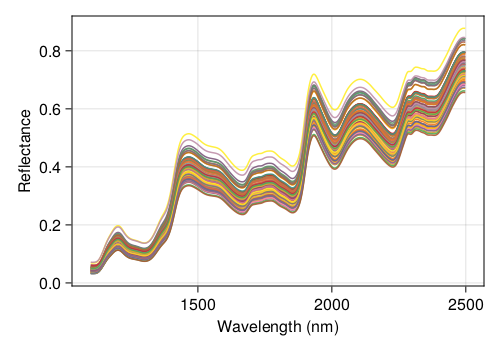

In [7]:
plotsp(Xm5, wl_num;
    xlabel = "Wavelength (nm)", ylabel = "Reflectance").f

In [8]:
typ = [repeat(["m5"], ntot); repeat(["mp5"], ntot);
    repeat(["mp6"], ntot)]
typ_num = recodcat2int(typ)

240-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3

In [9]:
lev = unique(typ)
nlev = length(lev)

3

In [10]:
fpreproc(X) = savgol(snv(X); f = 11, d = 2, pol = 3)
Xpm5 = fpreproc(Xm5)
Xpmp5 = fpreproc(Xmp5)
Xpmp6 = fpreproc(Xmp6)

80×700 Matrix{Float64}:
 -1.57101e-5  3.74345e-5  0.000110021  …  -0.000238522   5.37174e-5
 -3.67086e-5  2.19588e-5  0.00010356      -0.000294677  -1.10713e-5
 -4.61929e-5  9.96507e-6  9.02246e-5      -0.000288828  -1.61827e-6
 -4.53967e-5  1.00946e-5  8.97356e-5      -0.000273058   2.22003e-5
 -4.06598e-5  1.81826e-5  0.000102698     -0.000229648   2.97855e-5
 -3.46465e-5  2.18395e-5  9.96477e-5   …  -0.000253638   1.13546e-5
 -3.45677e-5  2.00571e-5  9.85362e-5      -0.000226624   4.43387e-5
 -3.23189e-5  2.09044e-5  9.64176e-5      -0.000209103   3.45617e-5
 -3.00411e-5  2.09932e-5  9.5878e-5       -0.000247485   3.22526e-5
 -2.80711e-5  2.04626e-5  8.84316e-5      -0.000228243   5.38692e-5
  ⋮                                    ⋱                
 -1.3422e-5   3.08818e-5  8.74007e-5      -0.000225846   0.000102115
 -1.2499e-5   3.52114e-5  9.82703e-5      -0.000289464   2.5682e-5
 -1.2857e-6   4.23129e-5  0.000100935     -0.000276864   5.70992e-5
 -1.62747e-5  4.4229e-5   0.0001218

In [11]:
zX = vcat(Xpm5, Xpmp5, Xpmp6)
fm = pcasvd(zX; nlv = 10) ;
T = fm.T

240×10 Matrix{Float64}:
 -9.44919e-5   -0.00129219    0.00114163   …   4.45062e-5   -0.00011188
  0.000561856  -0.00145157    0.00106157      -0.000500903   0.000138962
  0.00107935   -0.00197778    0.000432457     -0.000224575  -9.14373e-5
  0.00156663   -0.001589      0.00131202      -0.000358482  -3.83307e-5
 -0.00223517   -0.00135785    0.000753725      0.000112462  -0.000286687
 -0.00196813   -0.00141978    0.000677322  …   0.000102484  -0.000177225
 -0.00192782   -0.000749227   0.00133076       0.000121467   9.08152e-5
 -0.00261367   -0.000741363   0.00095534       0.000215481   0.000105574
 -0.000342384  -0.000935517   0.00166498       1.03366e-5    0.000207209
 -0.00029597   -0.00144142    0.00130679       0.000282197  -0.000210843
  ⋮                                        ⋱                
  0.00179124    0.00192061    0.000510898      0.000386949   0.000186273
  0.00387086    0.000451894  -0.000243784      0.000190843  -1.58043e-5
  0.0032637     0.00131658    8.17123e-6    

In [12]:
res = summary(fm, zX).explvarx

Row,lv,var,pvar,cumpvar
,Int64,Float64,Float64,Float64
1,1,4.07239e-6,0.526053,0.526053
2,2,1.81347e-6,0.234256,0.760309
3,3,7.34142e-7,0.0948331,0.855142
4,4,3.53769e-7,0.0456983,0.90084
5,5,1.51321e-7,0.0195469,0.920387
6,6,1.01075e-7,0.0130564,0.933444
7,7,8.28891e-8,0.0107072,0.944151
8,8,5.84124e-8,0.00754545,0.951696
9,9,5.17932e-8,0.00669041,0.958387


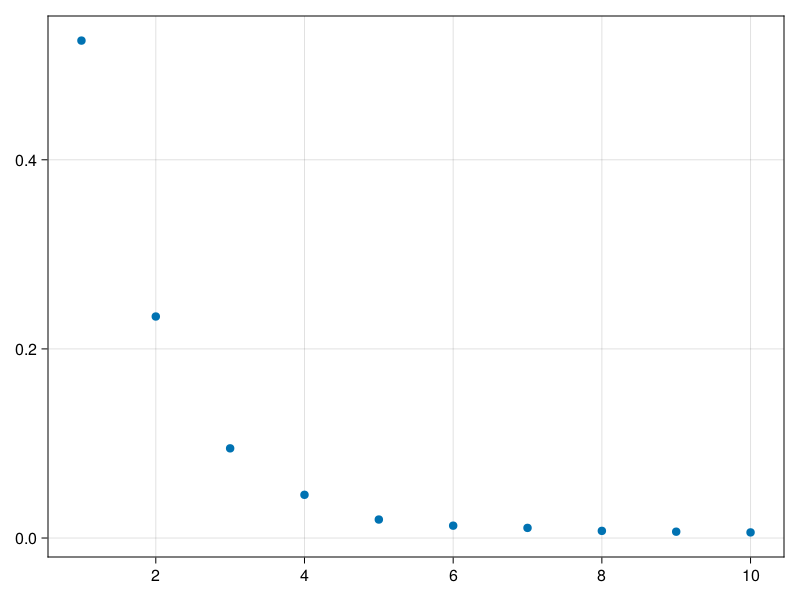

In [13]:
scatter(res.lv, res.pvar)

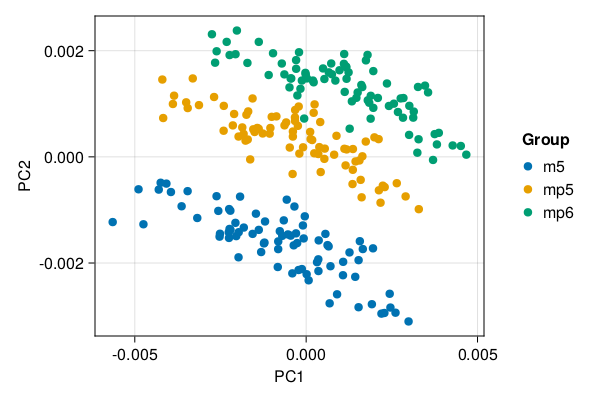

In [14]:
i = 1
plotxy(T[:, i:(i + 1)], typ;
    xlabel = string("PC", i), ylabel = string("PC", i + 1)).f

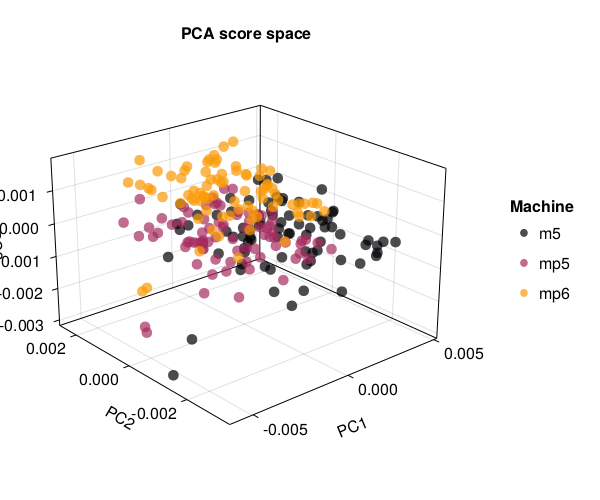

In [15]:
CairoMakie.activate!()
#GLMakie.activate!()
colsh = :default    # :tab10
colm = cgrad(colsh, 10; alpha = .7, categorical = true)[[1, 5, 8]]
i = 1
f = Figure(resolution = (600, 500))
ax = Axis3(f[1, 1]; perspectiveness = 0.2,
    xlabel = string("PC", i), ylabel = string("PC", i + 1),
    zlabel = string("PC", i + 2),
    title = "PCA score space")
scatter!(ax, T[:, i], T[:, i + 1], T[:, i + 2];
    markersize = 15, color = typ_num, colormap = colm)
lab = string.(lev)
elt = [MarkerElement(color = colm[i], marker = '●', markersize = 10) for i in 1:nlev]
title = "Machine"
Legend(f[1, 2], elt, lab, title;
    nbanks = 1, rowgap = 10, framevisible = false)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*